1、	获取恋家哈尔滨二手房的html文本（url：https://hrb.lianjia.com/ershoufang/）

In [1]:
import requests

In [3]:
def getHtml(url):
    headers = {
        'User-Agent':'Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, likeGecko) Chrome/81.0.4044.138 Safari/537.36'
    }
    response = requests.get(url=url,headers=headers)
    html = response.text
    return html

url = 'https://hrb.lianjia.com/ershoufang/'
lj_html=getHtml(url)

'<!DOCTYPE html><html><head><meta http-equiv="Content-Type" content="text/html; charset=utf-8"><meta http-equiv="X-UA-Compatible" content="IE=edge" /><meta http-equiv="Cache-Control" content="no-transform" /><meta http-equiv="Cache-Control" content="no-siteapp" /><meta http-equiv="Content-language" content="zh-CN" /><meta name="format-detection" content="telephone=no" /><meta name="applicable-device" content="pc"><meta name="location" content="province=黑龙江;city=哈尔滨;coord=45.8021,126.5358" /><link rel="alternate" media="only screen and (max-width: 640px)" href="https://m.lianjia.com/hrb/ershoufang/" >\n<meta name="mobile-agent" content="format=html5;url=https://m.lianjia.com/hrb/ershoufang/"><script>\nljConf = {\n    city_id: \'230100\',\n    city_abbr: \'hrb\',\n    city_name: \'哈尔滨\',\n    channel: \'ershoufang\',\n    page: \'ershoufang_search\',\n    pageConfig: {"ajaxroot":"https:\\/\\/ajax.api.lianjia.com\\/","imAppid":"LIANJIA_WEB_20160624","imAppkey":"6dfdcee27d78b1107fceeca55d8
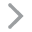
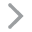

In [4]:
lj_html

2、	从网页中提取houseInfo、totalPrice、unitPrice、positionInfo（beautifulsoup  或  re）

In [5]:
import pandas as pd
from bs4 import BeautifulSoup

In [63]:
def getContent(html):
    data = pd.DataFrame(
        columns=['houseinfo', 'totalPrice', 'unitPrice', 'positionInfo'])
    result = []
    soup = BeautifulSoup(html)
    content = soup.find('ul', class_='sellListContent')
    for li in content.find_all('li', class_='clear LOGVIEWDATA LOGCLICKDATA'):
        houseinfo = li.find('div', class_='houseInfo').text
        price = li.find('div', class_='totalPrice').text
        unitprice = li.find('div', class_='unitPrice').text
        positioninfo = li.find('div', class_='positionInfo').text
        d = {'houseinfo': houseinfo, 'totalPrice': price,
             'unitPrice': unitprice, 'positionInfo': positioninfo}
        data = data.append(d, ignore_index=True)
    return data


data = getContent(lj_html)

In [64]:
display(data)

,houseinfo,totalPrice,unitPrice,positionInfo
0,2室1厅 | 46.92平米 | 南 北 | 精装 | 中楼层(共8层) | 板塔结合,45.8万,单价9762元/平米,安定街 - 安字片
1,2室2厅 | 119.97平米 | 东北 | 简装 | 高楼层(共31层) | 塔楼,130万,单价10837元/平米,嵩山国际 - 先锋路商圈
2,2室1厅 | 91.63平米 | 西 | 精装 | 中楼层(共28层) | 板塔结合,125万,单价13642元/平米,盟科观邸 - 船舶军工
3,2室1厅 | 109.46平米 | 南 北 | 精装 | 中楼层(共7层) | 板楼,97.8万,单价8935元/平米,会展家园小区 - 南岗会展商圈
4,2室1厅 | 100.91平米 | 西 北 | 简装 | 高楼层(共7层) | 板楼,69.9万,单价6927元/平米,征仪路花园小区B区 - 哈西商圈
5,1室1厅 | 50.36平米 | 南 | 精装 | 中楼层(共6层) | 板楼,39.8万,单价7904元/平米,滨才城三期 - 哈尔滨新区
6,3室1厅 | 132.4平米 | 南 北 | 简装 | 中楼层(共32层) | 板楼,157万,单价11859元/平米,紫金城 - 建国公园
7,2室1厅 | 86.84平米 | 东 西 | 精装 | 高楼层(共8层) | 板楼,62.5万,单价7198元/平米,永平小区 - 船舶军工
8,2室1厅 | 88平米 | 东 西 | 精装 | 中楼层(共33层) | 板楼,96万,单价10910元/平米,万达·秀园 - 松北世贸大道
9,3室1厅 | 136.7平米 | 南 北 | 毛坯 | 高楼层(共18层) | 板塔结合,139万,单价10169元/平米,鲁商凤凰城 - 哈南商圈


3、	将得到的数据中houseinfo拆分成 户型、面积、朝向、装修风格、共几层、类型6列，然后将数据写入txt文件，共有户型、面积、朝向、装修风格、共几层、类型、总价、单价、位置9列，得到house.txt

In [65]:
houseinfo=data['houseinfo'].values
df = pd.DataFrame()
for i in houseinfo:
    info = i.split('|')
    dic_info = {'户型': info[0], '面积': info[1], '朝向': info[2],
         '装修风格': info[3], '共几层': info[4], '类型': info[5]}
    df = df.append(d, ignore_index=True)
data = data.join(df).drop('houseinfo', axis=1)

In [67]:
display(data)

,totalPrice,unitPrice,positionInfo,共几层,户型,朝向,类型,装修风格,面积
0,45.8万,单价9762元/平米,安定街 - 安字片,中楼层(共8层),2室1厅,西,板楼,简装,47.7平米
1,130万,单价10837元/平米,嵩山国际 - 先锋路商圈,中楼层(共8层),2室1厅,西,板楼,简装,47.7平米
2,125万,单价13642元/平米,盟科观邸 - 船舶军工,中楼层(共8层),2室1厅,西,板楼,简装,47.7平米
3,97.8万,单价8935元/平米,会展家园小区 - 南岗会展商圈,中楼层(共8层),2室1厅,西,板楼,简装,47.7平米
4,69.9万,单价6927元/平米,征仪路花园小区B区 - 哈西商圈,中楼层(共8层),2室1厅,西,板楼,简装,47.7平米
5,39.8万,单价7904元/平米,滨才城三期 - 哈尔滨新区,中楼层(共8层),2室1厅,西,板楼,简装,47.7平米
6,157万,单价11859元/平米,紫金城 - 建国公园,中楼层(共8层),2室1厅,西,板楼,简装,47.7平米
7,62.5万,单价7198元/平米,永平小区 - 船舶军工,中楼层(共8层),2室1厅,西,板楼,简装,47.7平米
8,96万,单价10910元/平米,万达·秀园 - 松北世贸大道,中楼层(共8层),2室1厅,西,板楼,简装,47.7平米
9,139万,单价10169元/平米,鲁商凤凰城 - 哈南商圈,中楼层(共8层),2室1厅,西,板楼,简装,47.7平米


In [21]:
with open('./house.txt','w',encoding='utf-8') as f:
    for i in data.values:
        a = '\t'.join(i)
        f.write(a+'\n')

4、	读入dataframe，查看是否有缺失值。

In [22]:
data = pd.read_csv('./house.txt',names=['price','unitprice','positioninfo','共几层','户型','朝向','类型','装修风格','面积'],header=None,sep="\t",encoding='utf-8')
data.isnull().sum()

price           0
unitprice       0
positioninfo    0
共几层             0
户型              0
朝向              0
类型              0
装修风格            0
面积              0
dtype: int64